# CHALLENGE TELECOM X

#Bibliotecas y librerias

In [61]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


print("\n✅ Bibliotecas importadas exitosamente\n")


✅ Bibliotecas importadas exitosamente



#📌 Extracción

In [63]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

print(f"\n🔗 Conectando a la API...")
print(f"   URL: {url}\n")

try:
    # Realizar petición GET
    response = requests.get(url)
    response.raise_for_status()

    # Cargar JSON
    json_data = response.json()

    # Normalizar JSON a DataFrame
    df = pd.json_normalize(json_data)

    print(f"✅ Extracción exitosa!")
    print(f"   📊 Registros extraídos: {df.shape[0]:,}")
    print(f"   📊 Variables extraídas: {df.shape[1]}")

except Exception as e:
    print(f"❌ Error en la extracción: {e}")
    raise

print(f"\n📋 Primeras 5 filas del dataset:")
print(df.head())

print(f"\n📋 Columnas detectadas:")
for i, col in enumerate(df.columns, 0):
    print(f"   {i:2d}. {col}")


🔗 Conectando a la API...
   URL: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json

✅ Extracción exitosa!
   📊 Registros extraídos: 7,267
   📊 Variables extraídas: 21

📋 Primeras 5 filas del dataset:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2            

# Transformación

##CONOCER EL CONJUNTO DE DATOS

In [64]:
print("\n📊 Información general del dataset:")
print(df.info())

print("\n📊 Tipos de datos por columna:")
print(df.dtypes)

print(f"\n📏 Dimensiones del dataset:")
print(f"   • Filas (registros): {df.shape[0]:,}")
print(f"   • Columnas (variables): {df.shape[1]}")


📊 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.Tec

##COMPROBACIÓN DE INCONSISTENCIAS

In [65]:
# Crear copia para trabajar
df_clean = df.copy()

# Verificar valores nulos
print("\n🔍 Verificando valores nulos:")
nulos = df_clean.isnull().sum()
if nulos.sum() > 0:
    print(nulos[nulos > 0])
else:
    print("   ✅ No se encontraron valores nulos")


🔍 Verificando valores nulos:
   ✅ No se encontraron valores nulos


In [66]:
# Verificar duplicados
duplicados = df_clean.duplicated().sum()
print(f"\n🔍 Verificando duplicados:")
print(f"   Registros duplicados: {duplicados}")
if duplicados > 0:
    print(f"   ⚠️ Se encontraron {duplicados} registros duplicados")
else:
    print(f"   ✅ No hay registros duplicados")



🔍 Verificando duplicados:
   Registros duplicados: 0
   ✅ No hay registros duplicados


In [67]:
# Explorar valores únicos en columnas categóricas
print(f"\n🔍 Explorando variables categóricas:")
categorical_cols = df_clean.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_vals = df_clean[col].nunique()
    print(f"\n   📌 {col}: {unique_vals} valores únicos")
    print(f"      {df_clean[col].value_counts().head(10).to_dict()}")


🔍 Explorando variables categóricas:

   📌 customerID: 7267 valores únicos
      {'9995-HOTOH': 1, '0002-ORFBO': 1, '0003-MKNFE': 1, '9970-QBCDA': 1, '9968-FFVVH': 1, '9967-ATRFS': 1, '9966-VYRTZ': 1, '9965-YOKZB': 1, '9964-WBQDJ': 1, '9962-BFPDU': 1}

   📌 Churn: 3 valores únicos
      {'No': 5174, 'Yes': 1869, '': 224}

   📌 customer.gender: 2 valores únicos
      {'Male': 3675, 'Female': 3592}

   📌 customer.Partner: 2 valores únicos
      {'No': 3749, 'Yes': 3518}

   📌 customer.Dependents: 2 valores únicos
      {'No': 5086, 'Yes': 2181}

   📌 phone.PhoneService: 2 valores únicos
      {'Yes': 6560, 'No': 707}

   📌 phone.MultipleLines: 3 valores únicos
      {'No': 3495, 'Yes': 3065, 'No phone service': 707}

   📌 internet.InternetService: 3 valores únicos
      {'Fiber optic': 3198, 'DSL': 2488, 'No': 1581}

   📌 internet.OnlineSecurity: 3 valores únicos
      {'No': 3608, 'Yes': 2078, 'No internet service': 1581}

   📌 internet.OnlineBackup: 3 valores únicos
      {'No': 3182, 

##MANEJO DE INCONSISTENCIAS

In [68]:
print("\n" + "-"*80)
print("2.3 LIMPIEZA Y ESTANDARIZACIÓN DE DATOS")
print("-"*80)

# Limpiar espacios y convertir a minúsculas en columnas de texto
print("\n🧹 Limpiando datos de texto...")
for col in df_clean.select_dtypes(include=['object']).columns:
    if col != 'customerID':  # No modificar el ID
        df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

print("   ✅ Datos de texto limpiados")


--------------------------------------------------------------------------------
2.3 LIMPIEZA Y ESTANDARIZACIÓN DE DATOS
--------------------------------------------------------------------------------

🧹 Limpiando datos de texto...
   ✅ Datos de texto limpiados


In [69]:
# Convertir variables binarias Yes/No a 1/0
print("\n🔄 Convirtiendo variables binarias (Yes/No → 1/0)...")
binary_map = {'yes': 1, 'no': 0}

binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].map(binary_map)
        print(f"   ✓ {col}: convertido")


🔄 Convirtiendo variables binarias (Yes/No → 1/0)...
   ✓ Churn: convertido


In [70]:
# Estandarizar columnas categóricas de servicios
print("\n🔄 Estandarizando servicios adicionales...")
service_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies']

for col in service_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].replace({
            'no phone service': 'no',
            'no internet service': 'no'
        })
        print(f"   ✓ {col}: estandarizado")



🔄 Estandarizando servicios adicionales...


In [71]:
# Convertir columnas numéricas
print("\n🔢 Convirtiendo columnas numéricas...")
numeric_columns = ['tenure', 'Charges.Monthly', 'Charges.Total', 'SeniorCitizen']

for col in numeric_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        nulos = df_clean[col].isnull().sum()
        print(f"   ✓ {col}: convertido ({nulos} nulos detectados)")

# Manejo de valores nulos en Charges.Total
print("\n🔧 Manejando valores nulos en Charges.Total...")
if 'Charges.Total' in df_clean.columns:
    mask_nulo = df_clean['Charges.Total'].isnull()
    if mask_nulo.sum() > 0:
        # Imputar usando Monthly * tenure
        df_clean.loc[mask_nulo, 'Charges.Total'] = (
            df_clean.loc[mask_nulo, 'Charges.Monthly'] *
            df_clean.loc[mask_nulo, 'tenure']
        )
        print(f"   ✅ {mask_nulo.sum()} valores imputados usando Monthly × tenure")
    else:
        print(f"   ✅ No hay valores nulos")


🔢 Convirtiendo columnas numéricas...

🔧 Manejando valores nulos en Charges.Total...


In [72]:
# Verificar limpieza final
print("\n✅ LIMPIEZA COMPLETADA")
print(f"   Total registros: {len(df_clean):,}")
print(f"   Total valores nulos restantes: {df_clean.isnull().sum().sum()}")



✅ LIMPIEZA COMPLETADA
   Total registros: 7,267
   Total valores nulos restantes: 224


##COLUMNA DE CUENTAS DIARIAS

In [73]:
if 'Charges.Monthly' in df_clean.columns:
    df_clean['Charges.Daily'] = df_clean['Charges.Monthly'] / 30
    print(f"\n✅ Variable 'Charges.Daily' creada exitosamente")
    print(f"   Rango: ${df_clean['Charges.Daily'].min():.2f} - ${df_clean['Charges.Daily'].max():.2f}")
    print(f"   Promedio: ${df_clean['Charges.Daily'].mean():.2f}/día")

##ESTANDARIZACIÓN Y TRANSFORMACIÓN

In [74]:
print("\n" + "-"*80)
print("2.5 TRADUCCIÓN DE COLUMNAS AL ESPAÑOL")
print("-"*80)

# Diccionario de traducción EXACTO según columnas reales
traduccion = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',

    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Adulto_Mayor',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Antiguedad_Meses',

    'phone.PhoneService': 'Servicio_Telefono',
    'phone.MultipleLines': 'Lineas_Multiples',

    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'TV_Streaming',
    'internet.StreamingMovies': 'Peliculas_Streaming',

    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Factura_Digital',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Charges.Total': 'Cargo_Total'
}

# Traducir solo columnas existentes
columnas_traducidas = {k: v for k, v in traduccion.items() if k in df_clean.columns}
df_clean = df_clean.rename(columns=columnas_traducidas)

# Resultados
print(f"✅ {len(columnas_traducidas)} columnas traducidas correctamente\n")

print("📋 Columnas finales:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"   {i:2d}. {col}")

print("\n📊 Vista previa del dataset limpio:")
display(df_clean.head())



--------------------------------------------------------------------------------
2.5 TRADUCCIÓN DE COLUMNAS AL ESPAÑOL
--------------------------------------------------------------------------------
✅ 21 columnas traducidas correctamente

📋 Columnas finales:
    1. ID_Cliente
    2. Evasion
    3. Genero
    4. Adulto_Mayor
    5. Pareja
    6. Dependientes
    7. Antiguedad_Meses
    8. Servicio_Telefono
    9. Lineas_Multiples
   10. Servicio_Internet
   11. Seguridad_Online
   12. Respaldo_Online
   13. Proteccion_Dispositivo
   14. Soporte_Tecnico
   15. TV_Streaming
   16. Peliculas_Streaming
   17. Tipo_Contrato
   18. Factura_Digital
   19. Metodo_Pago
   20. Cargo_Mensual
   21. Cargo_Total

📊 Vista previa del dataset limpio:


,ID_Cliente,Evasion,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,0.0,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.3
1,0003-MKNFE,0.0,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.4
2,0004-TLHLJ,1.0,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-IGKFF,1.0,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.4


#📊 Carga y análisis

##ANÁLISIS DESCRIPTIVO

In [75]:
print("\n" + "-"*80)
print("3.1 ANÁLISIS DESCRIPTIVO")
print("-"*80)

# --------------------------------------------------
# 🔧 Corrección de tipos de datos
# --------------------------------------------------
df_clean['Cargo_Total'] = (
    df_clean['Cargo_Total']
    .replace(" ", np.nan)
    .replace("", np.nan)
)

df_clean['Cargo_Total'] = pd.to_numeric(df_clean['Cargo_Total'], errors='coerce')
df_clean['Cargo_Mensual'] = pd.to_numeric(df_clean['Cargo_Mensual'], errors='coerce')
df_clean['Antiguedad_Meses'] = pd.to_numeric(df_clean['Antiguedad_Meses'], errors='coerce')

# Eliminar filas con valores críticos nulos
df_clean = df_clean.dropna(subset=['Cargo_Total', 'Cargo_Mensual', 'Antiguedad_Meses'])

# --------------------------------------------------
# 📈 Estadísticas descriptivas
# --------------------------------------------------
print("\n📈 Estadísticas descriptivas - Variables numéricas:")
display(df_clean.describe())

print("\n📊 Estadísticas descriptivas - Variables categóricas:")
display(df_clean.describe(include=['object']))

# --------------------------------------------------
# 💡 Estadísticas clave
# --------------------------------------------------
print("\n💡 ESTADÍSTICAS CLAVE:")
print(f"   • Antigüedad promedio: {df_clean['Antiguedad_Meses'].mean():.1f} meses")
print(f"   • Antigüedad mediana: {df_clean['Antiguedad_Meses'].median():.0f} meses")
print(f"   • Cargo mensual promedio: ${df_clean['Cargo_Mensual'].mean():.2f}")
print(f"   • Cargo total promedio: ${df_clean['Cargo_Total'].mean():.2f}")
print(f"   • Tasa de evasión: {df_clean['Evasion'].mean()*100:.2f}%")
print(f"   • Clientes adultos mayores: {df_clean['Adulto_Mayor'].mean()*100:.1f}%")

# --------------------------------------------------
# 📊 Conclusión
# --------------------------------------------------
print("\n📊 CONCLUSIÓN - ANÁLISIS DESCRIPTIVO:")
print("-"*80)
print(f"""
El dataset contiene información de {len(df_clean):,} clientes de Telecom X.

• ANTIGÜEDAD:
  Los clientes presentan una antigüedad promedio de {df_clean['Antiguedad_Meses'].mean():.1f} meses,
  con una mediana de {df_clean['Antiguedad_Meses'].median():.0f} meses.

• CARGOS:
  El cargo mensual promedio es de ${df_clean['Cargo_Mensual'].mean():.2f},
  mientras que el gasto total acumulado promedio alcanza ${df_clean['Cargo_Total'].mean():.2f}.

• EVASIÓN:
  La tasa de churn es del {df_clean['Evasion'].mean()*100:.2f}%, lo que indica que
  aproximadamente 1 de cada {int(1/df_clean['Evasion'].mean()) if df_clean['Evasion'].mean() > 0 else 0}
  clientes ha cancelado el servicio.

• PERFIL DEMOGRÁFICO:
  El {df_clean['Adulto_Mayor'].mean()*100:.1f}% de los clientes corresponde a adultos mayores,
  un segmento relevante para estrategias de retención.
""")



--------------------------------------------------------------------------------
3.1 ANÁLISIS DESCRIPTIVO
--------------------------------------------------------------------------------

📈 Estadísticas descriptivas - Variables numéricas:


,Evasion,Adulto_Mayor,Antiguedad_Meses,Cargo_Mensual,Cargo_Total
count,7032.000000,7256.0000,7256.000000,7256.000000,7256.000000
mean,0.265785,0.1629,32.395535,64.755423,2280.634213
std,0.441782,0.3693,24.558067,30.125739,2268.632997
min,0.000000,0.0000,1.000000,18.250000,18.800000
25%,0.000000,0.0000,9.000000,35.450000,400.225000
50%,0.000000,0.0000,29.000000,70.300000,1391.000000
75%,1.000000,0.0000,55.000000,89.900000,3785.300000
max,1.000000,1.0000,72.000000,118.750000,8684.800000



📊 Estadísticas descriptivas - Variables categóricas:


,ID_Cliente,Genero,Pareja,Dependientes,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Digital,Metodo_Pago
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,7256,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,male,no,no,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check
freq,1,3669,3747,5086,6551,3490,3198,3607,3181,3194,3581,2895,2866,4005,4308,2445



💡 ESTADÍSTICAS CLAVE:
   • Antigüedad promedio: 32.4 meses
   • Antigüedad mediana: 29 meses
   • Cargo mensual promedio: $64.76
   • Cargo total promedio: $2280.63
   • Tasa de evasión: 26.58%
   • Clientes adultos mayores: 16.3%

📊 CONCLUSIÓN - ANÁLISIS DESCRIPTIVO:
--------------------------------------------------------------------------------

El dataset contiene información de 7,256 clientes de Telecom X.

• ANTIGÜEDAD:
  Los clientes presentan una antigüedad promedio de 32.4 meses,
  con una mediana de 29 meses.

• CARGOS:
  El cargo mensual promedio es de $64.76,
  mientras que el gasto total acumulado promedio alcanza $2280.63.

• EVASIÓN:
  La tasa de churn es del 26.58%, lo que indica que
  aproximadamente 1 de cada 3
  clientes ha cancelado el servicio.

• PERFIL DEMOGRÁFICO:
  El 16.3% de los clientes corresponde a adultos mayores,
  un segmento relevante para estrategias de retención.



##DISTRIBUCIÓN DE EVASIÓN


--------------------------------------------------------------------------------
3.2 DISTRIBUCIÓN DE EVASIÓN
--------------------------------------------------------------------------------

📊 Distribución de clientes:
   • Clientes ACTIVOS (0): 5,163 (73.42%)
   • Clientes en Deserción (1): 1,869 (26.58%)


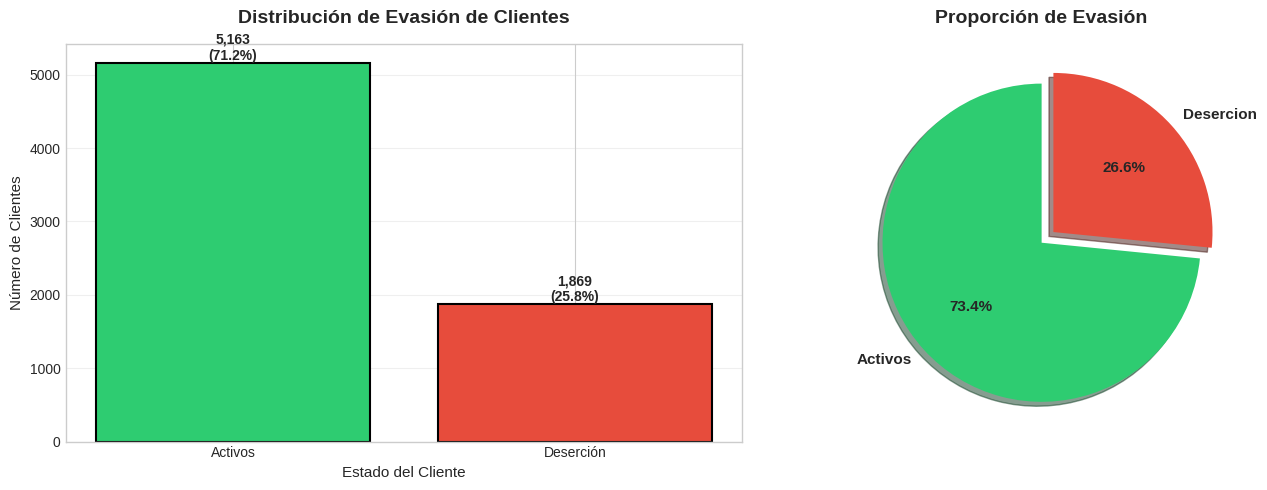


📊 CONCLUSIÓN - DISTRIBUCIÓN DE EVASIÓN:
--------------------------------------------------------------------------------

ANÁLISIS DE LA TASA DE DESERCIÓN:

• Del total de 7,256 clientes analizados, 1,869 (26.6%) han cancelado sus servicios,
  mientras que 5,163 (73.4%) permanecen activos.

• Una tasa de desercion del 26.6% es ALTA para la industria de telecomunicaciones,
  donde el promedio suele estar entre 15-25%.

• Esto representa una pérdida potencial significativa de ingresos recurrentes que
  requiere estrategias inmediatas de retención.

• Es fundamental identificar los factores que llevan a los clientes a cancelar
  para desarrollar intervenciones efectivas.



In [76]:

print("\n" + "-"*80)
print("3.2 DISTRIBUCIÓN DE EVASIÓN")
print("-"*80)

# Calcular estadísticas
evasion_counts = df_clean['Evasion'].value_counts().sort_index()
evasion_pct = df_clean['Evasion'].value_counts(normalize=True).sort_index() * 100

print(f"\n📊 Distribución de clientes:")
print(f"   • Clientes ACTIVOS (0): {evasion_counts[0]:,} ({evasion_pct[0]:.2f}%)")
print(f"   • Clientes en Deserción (1): {evasion_counts[1]:,} ({evasion_pct[1]:.2f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
colors = ['#2ecc71', '#e74c3c']
bars = axes[0].bar(['Activos', 'Deserción'], evasion_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_title('Distribución de Evasión de Clientes', fontsize=14, fontweight='bold', pad=15)
axes[0].set_ylabel('Número de Clientes', fontsize=11)
axes[0].set_xlabel('Estado del Cliente', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({height/len(df_clean)*100:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

# Gráfico de pastel
wedges, texts, autotexts = axes[1].pie(
    evasion_counts.values,
    labels=['Activos', 'Desercion'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0, 0.1),
    shadow=True,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)
axes[1].set_title('Proporción de Evasión', fontsize=14, fontweight='bold', pad=15)
# Guardar Gráfico como PNG
fig.savefig("distribucion_evacion.png", transparent=False, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

print("\n📊 CONCLUSIÓN - DISTRIBUCIÓN DE EVASIÓN:")
print("-"*80)
print("""
ANÁLISIS DE LA TASA DE DESERCIÓN:

• Del total de {:,} clientes analizados, {:,} ({:.1f}%) han cancelado sus servicios,
  mientras que {:,} ({:.1f}%) permanecen activos.

• Una tasa de desercion del {:.1f}% es {} para la industria de telecomunicaciones,
  donde el promedio suele estar entre 15-25%.

• Esto representa una pérdida potencial significativa de ingresos recurrentes que
  requiere estrategias inmediatas de retención.

• Es fundamental identificar los factores que llevan a los clientes a cancelar
  para desarrollar intervenciones efectivas.
""".format(
    len(df_clean),
    evasion_counts[1],
    evasion_pct[1],
    evasion_counts[0],
    evasion_pct[0],
    evasion_pct[1],
    'ALTA' if evasion_pct[1] > 25 else 'MODERADA' if evasion_pct[1] > 15 else 'BAJA'
))

##RECUENTO DE EVASIÓN POR VARIABLES CATEGÓRICAS


--------------------------------------------------------------------------------
EVASIÓN SEGÚN TIPO DE CONTRATO
--------------------------------------------------------------------------------


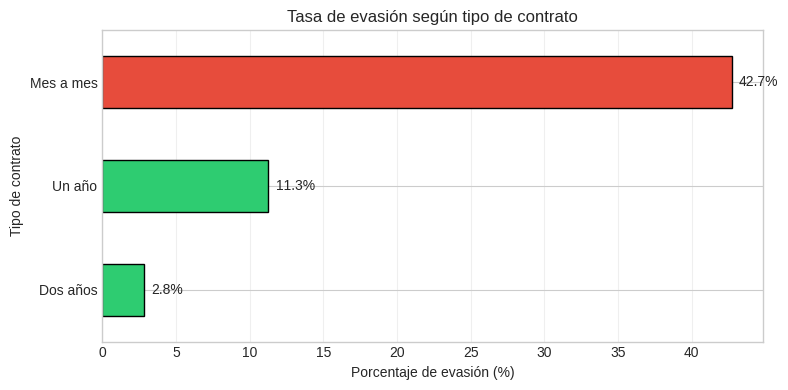

In [77]:
print("\n" + "-"*80)
print("EVASIÓN SEGÚN TIPO DE CONTRATO")
print("-"*80)

# --------------------------------------------------
# Traducción de valores categóricos
# --------------------------------------------------
traduccion_contrato = {
    'month-to-month': 'Mes a mes',
    'one year': 'Un año',
    'two year': 'Dos años'
}

df_clean['Tipo_Contrato_ES'] = df_clean['Tipo_Contrato'].replace(traduccion_contrato)

# --------------------------------------------------
# Calcular tasa de evasión (%)
# --------------------------------------------------
tasa_contrato = (
    df_clean
    .groupby('Tipo_Contrato_ES')['Evasion']
    .mean()
    .sort_values()
    * 100
)

# --------------------------------------------------
# Asignar colores según nivel de evasión
# --------------------------------------------------
colores = []
for valor in tasa_contrato:
    if valor >= 30:
        colores.append('#e74c3c')   # Rojo: alta evasión
    elif valor >= 15:
        colores.append('#f1c40f')   # Amarillo: media evasión
    else:
        colores.append('#2ecc71')   # Verde: baja evasión

# --------------------------------------------------
# Gráfica
# --------------------------------------------------
plt.figure(figsize=(8, 4))
tasa_contrato.plot(kind='barh', color=colores, edgecolor='black')

plt.xlabel("Porcentaje de evasión (%)")
plt.ylabel("Tipo de contrato")
plt.title("Tasa de evasión según tipo de contrato")
plt.grid(axis='x', alpha=0.3)

# Mostrar porcentaje en cada barra
for i, v in enumerate(tasa_contrato):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
# 💾 Guardar el gráfico como imagen PNG
plt.tight_layout()
plt.savefig(
    "grafico_evasion_tipo_contrato.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()

CONCLUSIÓN:
Los clientes con contratos mes a mes presentan una tasa de evasión
considerablemente más alta, lo que indica menor compromiso con la empresa.
Por el contrario, los contratos de uno y dos años muestran tasas de evasión
mucho más bajas, evidenciando que los acuerdos a largo plazo son un factor
clave para la retención de clientes.


--------------------------------------------------------------------------------
EVASIÓN SEGÚN MÉTODO DE PAGO
--------------------------------------------------------------------------------


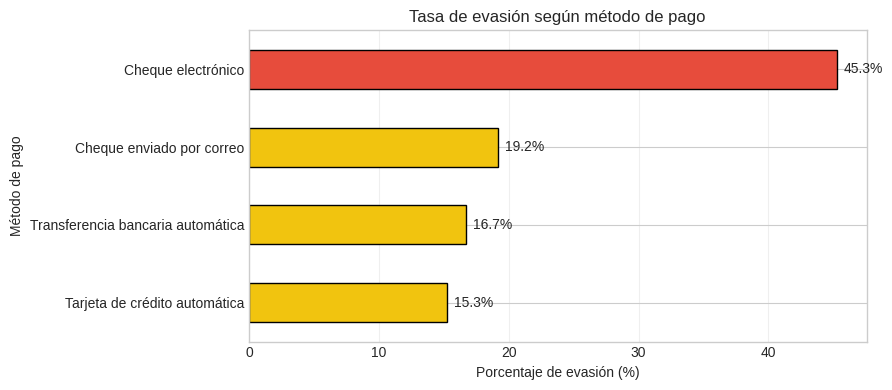

In [78]:
print("\n" + "-"*80)
print("EVASIÓN SEGÚN MÉTODO DE PAGO")
print("-"*80)

# --------------------------------------------------
# Traducción de valores del método de pago
# --------------------------------------------------
traduccion_pago = {
    'electronic check': 'Cheque electrónico',
    'mailed check': 'Cheque enviado por correo',
    'bank transfer (automatic)': 'Transferencia bancaria automática',
    'credit card (automatic)': 'Tarjeta de crédito automática'
}

df_clean['Metodo_Pago_ES'] = df_clean['Metodo_Pago'].replace(traduccion_pago)

# --------------------------------------------------
# Calcular tasa de evasión (%)
# --------------------------------------------------
tasa_pago = (
    df_clean
    .groupby('Metodo_Pago_ES')['Evasion']
    .mean()
    .sort_values()
    * 100
)

# --------------------------------------------------
# Colores según nivel de evasión
# --------------------------------------------------
colores = []
for valor in tasa_pago:
    if valor >= 30:
        colores.append('#e74c3c')   # Alta evasión
    elif valor >= 15:
        colores.append('#f1c40f')   # Evasión media
    else:
        colores.append('#2ecc71')   # Baja evasión

# --------------------------------------------------
# Gráfica
# --------------------------------------------------
plt.figure(figsize=(9, 4))
tasa_pago.plot(kind='barh', color=colores, edgecolor='black')

plt.xlabel("Porcentaje de evasión (%)")
plt.ylabel("Método de pago")
plt.title("Tasa de evasión según método de pago")
plt.grid(axis='x', alpha=0.3)

# Etiquetas de porcentaje
for i, v in enumerate(tasa_pago):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')

# 💾 Guardar el gráfico como imagen PNG
plt.tight_layout()
plt.savefig(
    "grafico_evasion_metodo_pago.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()



CONCLUSIÓN:
Los métodos de pago automáticos presentan las tasas de evasión más bajas,
lo que sugiere que la automatización reduce la fricción y mejora la
retención de clientes. Por el contrario, los clientes que pagan mediante
cheque electrónico o cheque físico muestran una mayor propensión a cancelar
el servicio.




--------------------------------------------------------------------------------
EVASIÓN SEGÚN SERVICIO DE INTERNET
--------------------------------------------------------------------------------


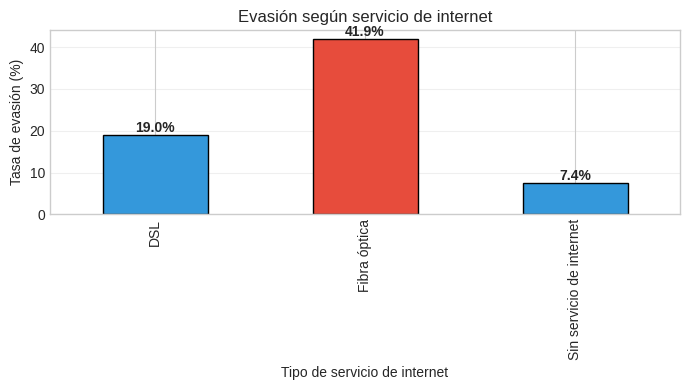

In [79]:
print("\n" + "-"*80)
print("EVASIÓN SEGÚN SERVICIO DE INTERNET")
print("-"*80)

# Traducción de valores
traduccion_internet = {
    'dsl': 'DSL',
    'fiber optic': 'Fibra óptica',
    'no': 'Sin servicio de internet'
}

df_clean['Servicio_Internet_ES'] = df_clean['Servicio_Internet'].replace(traduccion_internet)

# Tasa de evasión
tasa_internet = df_clean.groupby('Servicio_Internet_ES')['Evasion'].mean() * 100

# Crear lista de colores: rojo para el máximo, verde para los demás
colores = ['#e74c3c' if v == tasa_internet.max() else '#3498db' for v in tasa_internet]

plt.figure(figsize=(7, 4))
tasa_internet.plot(kind='bar', edgecolor='black', color=colores)

plt.ylabel("Tasa de evasión (%)")
plt.xlabel("Tipo de servicio de internet")
plt.title("Evasión según servicio de internet")
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(tasa_internet):
    plt.text(i, v + 0.8, f"{v:.1f}%", ha='center', fontweight='bold')

# 💾 Guardar imagen
plt.tight_layout()
plt.savefig("evasion_servicio_internet.png", dpi=300, bbox_inches='tight')
plt.show()

CONCLUSIÓN:
El tipo de servicio de internet influye directamente en la evasión.
Los clientes con fibra óptica presentan una mayor tasa de cancelación,
mientras que aquellos sin servicio de internet muestran mayor estabilidad.


--------------------------------------------------------------------------------
EVASIÓN SEGÚN SEGURIDAD ONLINE
--------------------------------------------------------------------------------


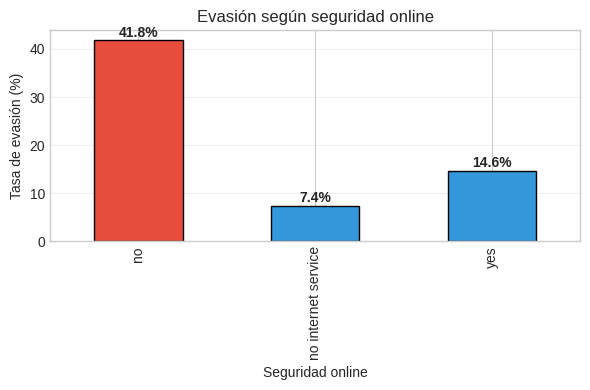

In [80]:
print("\n" + "-"*80)
print("EVASIÓN SEGÚN SEGURIDAD ONLINE")
print("-"*80)

tasa_seguridad = df_clean.groupby('Seguridad_Online')['Evasion'].mean() * 100

# Crear lista de colores: rojo para el máximo, azul para los demás
colores = ['#e74c3c' if v == tasa_seguridad.max() else '#3498db' for v in tasa_seguridad]

plt.figure(figsize=(6, 4))
tasa_seguridad.plot(kind='bar', edgecolor='black', color=colores)

plt.ylabel("Tasa de evasión (%)")
plt.xlabel("Seguridad online")
plt.title("Evasión según seguridad online")
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(tasa_seguridad):
    plt.text(i, v + 0.8, f"{v:.1f}%", ha='center', fontweight='bold')

# 💾 Guardar imagen
plt.tight_layout()
plt.savefig("evasion_seguridad_online.png", dpi=300, bbox_inches='tight')
plt.show()

CONCLUSIÓN:
Los clientes que no cuentan con seguridad online presentan una tasa de
evasión significativamente mayor. Este servicio genera confianza y
aumenta la permanencia del cliente.


--------------------------------------------------------------------------------
EVASIÓN SEGÚN ADULTO MAYOR
--------------------------------------------------------------------------------


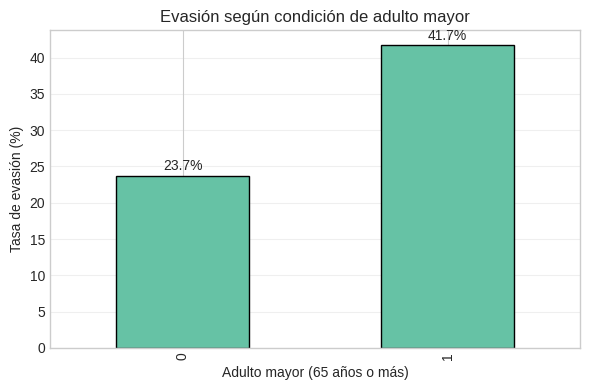

In [81]:



print("\n" + "-"*80)
print("EVASIÓN SEGÚN ADULTO MAYOR")
print("-"*80)

tasa_adulto = df_clean.groupby('Adulto_Mayor')['Evasion'].mean() * 100

plt.figure(figsize=(6, 4))
tasa_adulto.plot(kind='bar', edgecolor='black')

plt.ylabel("Tasa de evasión (%)")
plt.xlabel("Adulto mayor (65 años o más)")
plt.title("Evasión según condición de adulto mayor")
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(tasa_adulto):
    plt.text(i, v + 0.8, f"{v:.1f}%", ha='center')

# 💾 Guardar imagen
plt.tight_layout()
plt.savefig("evasion_adulto_mayor.png", dpi=300, bbox_inches='tight')
plt.show()


CONCLUSIÓN:
Los adultos mayores presentan una tasa de evasión diferente frente a
los clientes más jóvenes. Este comportamiento resalta la necesidad de
estrategias de atención diferenciadas para este segmento.

##EVASIÓN POR VARIABLES NUMÉRICAS

In [82]:
# ----------------------------------------------------------------------------
# 3.4 EVASIÓN POR VARIABLES NUMÉRICAS
# ----------------------------------------------------------------------------

print("\n" + "-" * 80)
print("3.4 EVASIÓN POR VARIABLES NUMÉRICAS")
print("-" * 80)

# ---------------------------------------------------------------------------
# Variables numéricas a analizar
# ---------------------------------------------------------------------------
variables_numericas = ['Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total']
variables_numericas = [col for col in variables_numericas if col in df_clean.columns]

print(f"\n📊 Se analizarán {len(variables_numericas)} variables numéricas.\n")

# ---------------------------------------------------------------------------
# Análisis estadístico por estado de evasión
# ---------------------------------------------------------------------------
print("📈 ESTADÍSTICAS DESCRIPTIVAS POR ESTADO DE EVASIÓN")
print("-" * 80)

for variable in variables_numericas:
    print(f"\n🔹 Variable analizada: {variable}")
    print("-" * 50)

    # Estadísticas descriptivas por grupo
    estadisticas = df_clean.groupby('Evasion')[variable].describe()
    estadisticas.index = ['Activo', 'Evasión']

    print(estadisticas)

    # -----------------------------------------------------------------------
    # Comparación de promedios entre grupos
    # -----------------------------------------------------------------------
    promedio_activo = df_clean[df_clean['Evasion'] == 0][variable].mean()
    promedio_evasion = df_clean[df_clean['Evasion'] == 1][variable].mean()

    diferencia = promedio_evasion - promedio_activo
    diferencia_pct = (diferencia / promedio_activo * 100) if promedio_activo != 0 else 0

    print("\n📊 COMPARACIÓN DE PROMEDIOS:")
    print(f"   • Promedio clientes activos : {promedio_activo:.2f}")
    print(f"   • Promedio clientes en evasión: {promedio_evasion:.2f}")
    print(f"   • Diferencia promedio        : {diferencia:+.2f} ({diferencia_pct:+.1f}%)")

    if diferencia > 0:
        print(f"   ⚠️  Los clientes en evasión presentan un valor MÁS ALTO en {variable}.")
    else:
        print(f"   ✅ Los clientes activos presentan un valor MÁS ALTO en {variable}.")



--------------------------------------------------------------------------------
3.4 EVASIÓN POR VARIABLES NUMÉRICAS
--------------------------------------------------------------------------------

📊 Se analizarán 3 variables numéricas.

📈 ESTADÍSTICAS DESCRIPTIVAS POR ESTADO DE EVASIÓN
--------------------------------------------------------------------------------

🔹 Variable analizada: Antiguedad_Meses
--------------------------------------------------
          count       mean        std  min   25%   50%   75%   max
Activo   5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
Evasión  1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

📊 COMPARACIÓN DE PROMEDIOS:
   • Promedio clientes activos : 37.65
   • Promedio clientes en evasión: 17.98
   • Diferencia promedio        : -19.67 (-52.2%)
   ✅ Los clientes activos presentan un valor MÁS ALTO en Antiguedad_Meses.

🔹 Variable analizada: Cargo_Mensual
--------------------------------------------------
          count

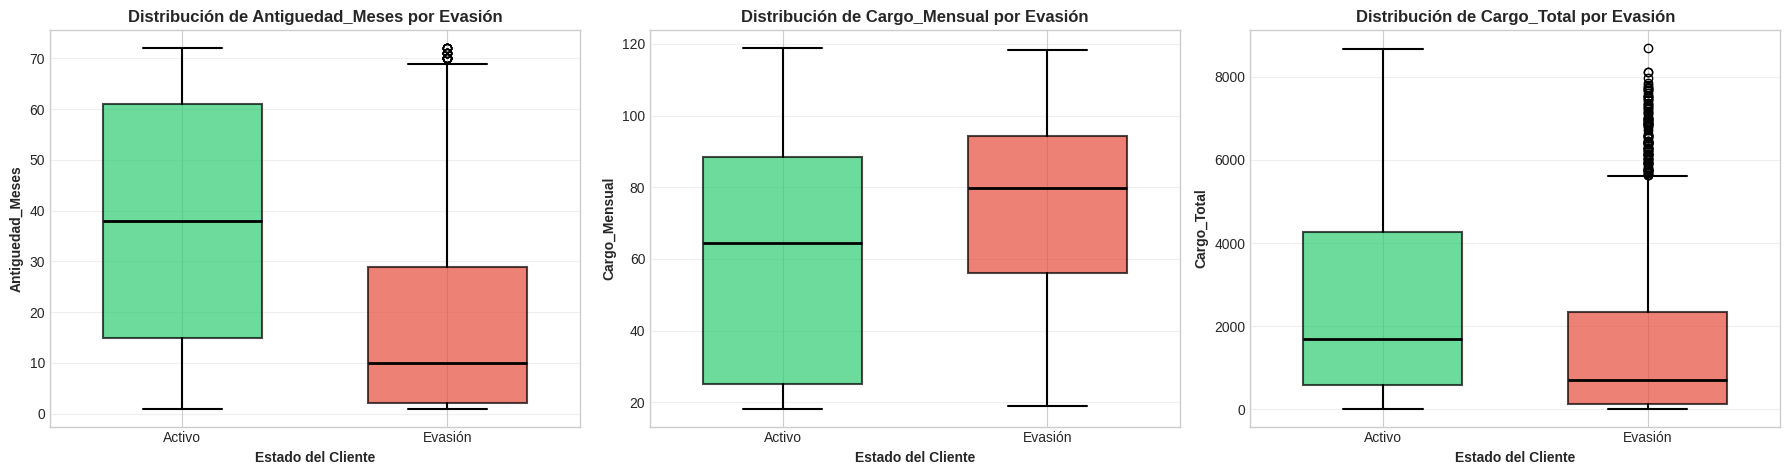

In [83]:
# Visualización - Boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(variables_numericas):
    # Preparar datos
    data_activo = df_clean[df_clean['Evasion']==0][col]
    data_evasion = df_clean[df_clean['Evasion']==1][col]

    # Crear boxplot con colores
    bp = axes[idx].boxplot([data_activo, data_evasion],
                           labels=['Activo', 'Evasión'],
                           patch_artist=True,
                           widths=0.6)

    # Colorear cajas
    colores = ['#2ecc71', '#e74c3c']  # Verde para activo, Rojo para evasión
    for patch, color in zip(bp['boxes'], colores):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
        patch.set_edgecolor('black')
        patch.set_linewidth(1.5)

    # Colorear medianas
    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(2)

    # Colorear whiskers y caps
    for whisker in bp['whiskers']:
        whisker.set_color('black')
        whisker.set_linewidth(1.5)
    for cap in bp['caps']:
        cap.set_color('black')
        cap.set_linewidth(1.5)

    axes[idx].set_title(f'Distribución de {col} por Evasión',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Estado del Cliente', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=10, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='y')

plt.suptitle('')  # Remover título automático
plt.tight_layout()
plt.savefig("boxplot_variables_numericas.png", dpi=300, bbox_inches='tight')
plt.show()

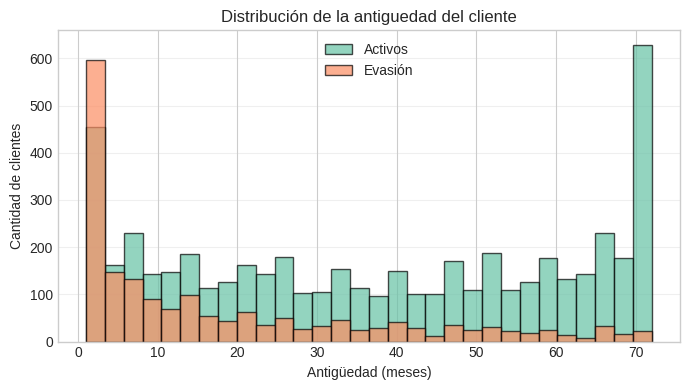

In [84]:
plt.figure(figsize=(7, 4))

activos = df_clean[df_clean['Evasion'] == 0]['Antiguedad_Meses'].dropna()
evasion = df_clean[df_clean['Evasion'] == 1]['Antiguedad_Meses'].dropna()

plt.hist(activos, bins=30, alpha=0.7, label='Activos', edgecolor='black')
plt.hist(evasion, bins=30, alpha=0.7, label='Evasión', edgecolor='black')

plt.title("Distribución de la antiguedad del cliente")
plt.xlabel("Antigüedad (meses)")
plt.ylabel("Cantidad de clientes")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()

plt.savefig("distribuccion_antiguedad.png", dpi=300, bbox_inches='tight')
plt.show()


Conclusión

La distribución de la antiguedad revela que los clientes que abandonan el servicio suelen tener una permanencia significativamente menor. La mayor concentración de evasión ocurre durante los primeros meses de relación con la empresa, lo que indica que el periodo inicial es crítico para la fidelización. A medida que aumenta la antiguedad, disminuye la probabilidad de evasión.

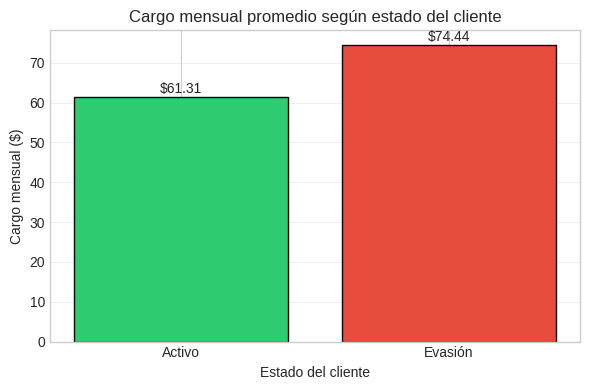

In [85]:
plt.figure(figsize=(6,4))

promedios = df_clean.groupby('Evasion')['Cargo_Mensual'].mean()
promedios.index = ['Activo', 'Evasión']

plt.bar(
    promedios.index,
    promedios.values,
    color=['#2ecc71', '#e74c3c'],
    edgecolor='black'
)

plt.title("Cargo mensual promedio según estado del cliente")
plt.ylabel("Cargo mensual ($)")
plt.xlabel("Estado del cliente")
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(promedios):
    plt.text(i, v + 1, f"${v:.2f}", ha='center')

plt.tight_layout()
plt.savefig("Cargo_mensual_promedio_estado_cliente.png", dpi=300, bbox_inches='tight')
plt.show()


Conclusión

El análisis del cargo mensual evidencia que los clientes que presentan evasión tienen, en promedio, un costo mensual más alto que aquellos que permanecen activos. Aunque ambos grupos comparten rangos similares de precios, la diferencia promedio muestra que un mayor cargo mensual incrementa la probabilidad de cancelación. Esto sugiere que la percepción de valor frente al costo es un factor clave en la decisión de permanencia del cliente.

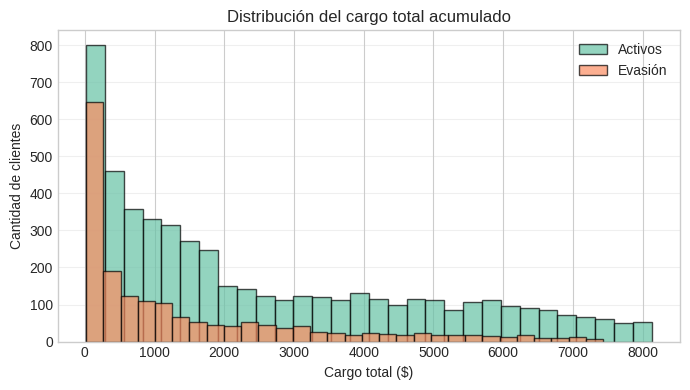

In [86]:
plt.figure(figsize=(7, 4))

activos = df_clean[df_clean['Evasion'] == 0]['Cargo_Total'].dropna()
evasion = df_clean[df_clean['Evasion'] == 1]['Cargo_Total'].dropna()

# Limitar valores extremos para que se vea
activos = activos[activos < activos.quantile(0.99)]
evasion = evasion[evasion < evasion.quantile(0.99)]

plt.hist(activos, bins=30, alpha=0.7, label='Activos', edgecolor='black')
plt.hist(evasion, bins=30, alpha=0.7, label='Evasión', edgecolor='black')

plt.title("Distribución del cargo total acumulado")
plt.xlabel("Cargo total ($)")
plt.ylabel("Cantidad de clientes")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig("distribuccion_cargo_total.png", dpi=300, bbox_inches='tight')
plt.show()




Conclusión

El cargo total acumulado es mayor en los clientes activos debido a su mayor tiempo de permanencia. Esta variable no representa una causa directa de evasión, sino una consecuencia de la fidelidad del cliente. Los clientes con mayor inversión acumulada tienden a mantenerse en el servicio, lo que refleja un mayor compromiso con la empresa.

# **📄INFORME FINAL**

🔹 1. Introducción

El presente informe tiene como objetivo analizar el fenómeno de evasión de clientes (churn) en la empresa Telecom X, utilizando un conjunto de datos que contiene información demográfica, contractual y de consumo de los clientes.
El análisis busca identificar patrones y variables clave que influyen en la decisión de cancelación del servicio, con el fin de proponer estrategias que permitan reducir la tasa de evasión y mejorar la retención de clientes.

🔹 2. Limpieza y Tratamiento de Datos

Durante esta etapa se realizaron las siguientes acciones:

Importación del conjunto de datos desde un archivo JSON.

Revisión de valores nulos y corrección de tipos de datos.

Conversión de variables numéricas (como cargos y antigüedad).

Traducción y estandarización de nombres de columnas.

Eliminación de inconsistencias y preparación de los datos para análisis.

Clasificación de variables en categóricas y numéricas.

Este proceso garantizó la calidad y coherencia de la información utilizada en el análisis.

🔹 3. Análisis Exploratorio de Datos
📊 3.1 Análisis de Variables Categóricas

Se analizaron variables como tipo de contrato, método de pago, servicios adicionales y tipo de conexión a internet.
Los principales hallazgos fueron:

Los clientes con contratos mes a mes presentan la mayor tasa de evasión.

La ausencia de servicios como seguridad online y soporte técnico incrementa significativamente la probabilidad de cancelación.

Los métodos de pago no automáticos están asociados con mayor evasión.

Los clientes con servicios adicionales muestran mayor permanencia.

📊 3.2 Análisis de Variables Numéricas
Antigüedad

Los clientes que abandonan el servicio presentan una antigüedad significativamente menor. Los primeros meses representan el periodo de mayor riesgo.

Cargo Mensual

Los clientes con cargos mensuales más altos tienen una mayor probabilidad de evasión, lo que sugiere sensibilidad al precio o una percepción insuficiente del valor recibido.

Cargo Total

El cargo total acumulado es mayor en clientes activos, reflejando su permanencia prolongada. Esta variable no causa la evasión, sino que la describe.

🔹 4. Conclusiones Generales

La evasión está fuertemente influenciada por factores contractuales y económicos.

Los primeros meses del cliente son críticos para la retención.

Un mayor costo mensual incrementa el riesgo de abandono si no se percibe valor suficiente.

Los servicios adicionales actúan como factores protectores frente a la evasión.

La permanencia genera mayor inversión acumulada y reduce la probabilidad de cancelación.

🔹 5. Recomendaciones Estratégicas

Fortalecer la retención temprana mediante programas de bienvenida y acompañamiento en los primeros meses.

Incentivar contratos de mayor duración con beneficios progresivos.

Ofrecer paquetes de valor agregado (seguridad, soporte técnico, protección).

Revisar la estructura de precios para clientes con cargos elevados.

Implementar estrategias de fidelización basadas en el historial y comportamiento del cliente.

✅ CONCLUSIÓN FINAL

El análisis demuestra que la evasión de clientes en Telecom X no es aleatoria, sino el resultado de una combinación de factores contractuales, económicos y de experiencia del cliente. Comprender estos patrones permite diseñar estrategias efectivas de retención, mejorar la satisfacción del cliente y fortalecer la sostenibilidad del negocio a largo plazo.